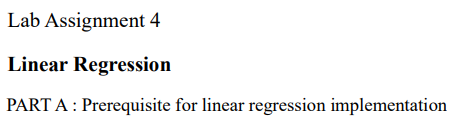

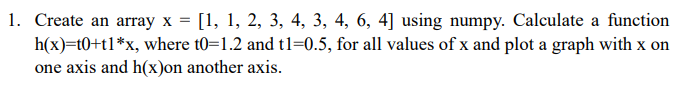

In [1]:
import numpy as np
import pandas as pd
from sympy import Array as disp
import matplotlib.pyplot as plt
%matplotlib inline

[1, 1, 2, 3, 4, 3, 4, 6, 4]


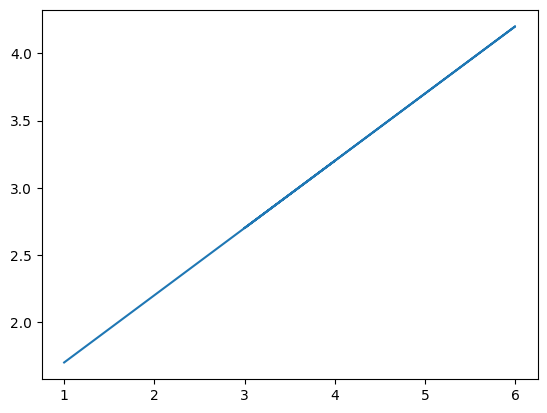

In [2]:
x = np.array([1, 1, 2, 3, 4, 3, 4 ,6, 4])
print(disp(x))
t0, t1 = 1.2, 0.5
h = lambda x: t0 + t1*x
plt.plot(x, h(x))

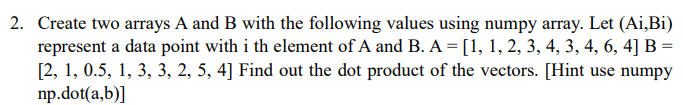

In [3]:
A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])
disp(np.dot(A, B))

82.0

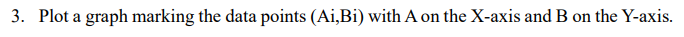

Text(0, 0.5, 'B')

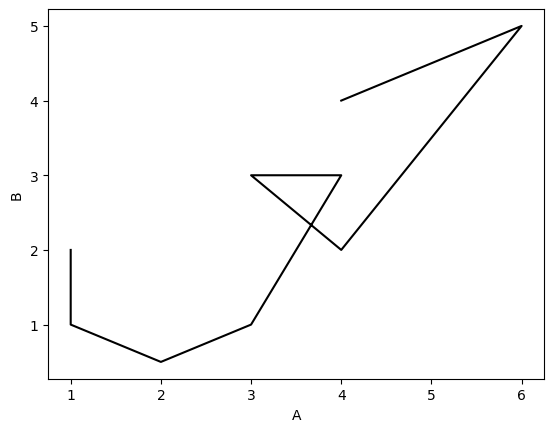

In [4]:
plt.plot(A, B, 'k-')
plt.xlabel('A')
plt.ylabel('B')

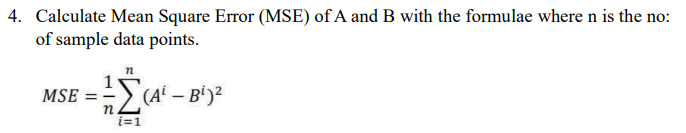

In [5]:
MSE = lambda A, B: np.sum(np.square(A-B))/len(A)
MSE(A, B)

1.4722222222222223

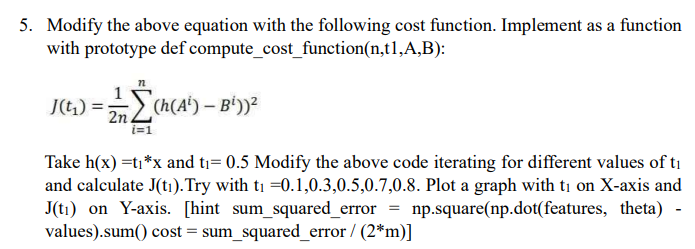

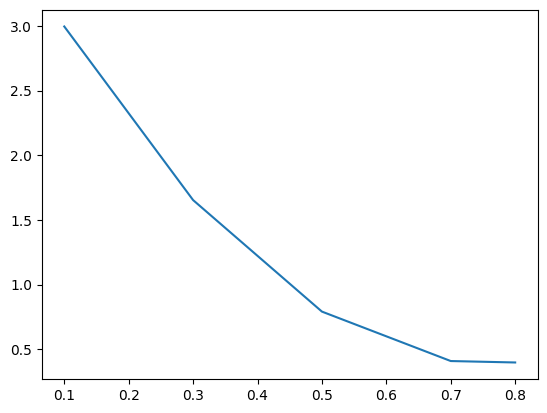

In [6]:
h = lambda x, t1: t1*x
J = lambda n, t1, A, B: np.sum(np.square(h(t1,A)-B))/(2*n)
t1 = [0.1,0.3,0.5,0.7,0.8]
out = [J(9, i, A, B) for i in t1]
plt.plot(t1, out)

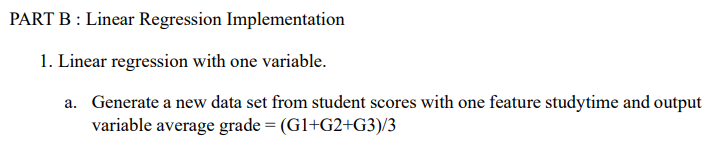

In [7]:
df = pd.read_csv('/content/Students.csv')

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

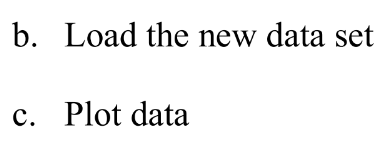

In [10]:
db = pd.DataFrame(df['studytime'])

In [11]:
db.insert(1, 'Grade', (df['G1']+df['G2']+df['G3'])/3)

In [12]:
db.head()

,studytime,Grade
0,2,5.666667
1,2,5.333333
2,2,8.333333
3,3,14.666667
4,2,8.666667


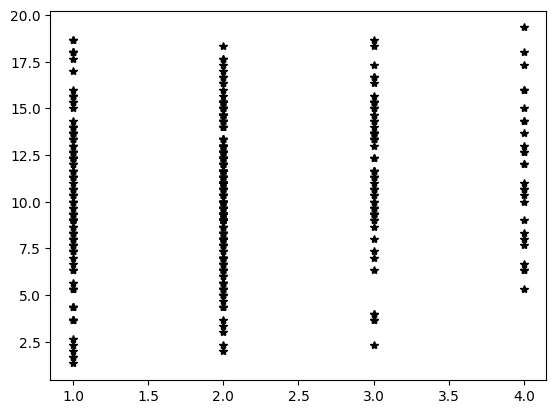

In [13]:
plt.plot(db["studytime"], db["Grade"], 'k*')

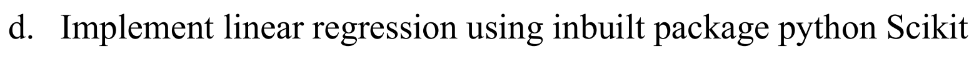

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
X = db['studytime'].values.reshape(-1, 1)
y = db['Grade'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


print(reg.score(X_test, y_test))

print(mean_squared_error(y_test, y_pred))

-0.0006771080882395086
1.1366651438604667


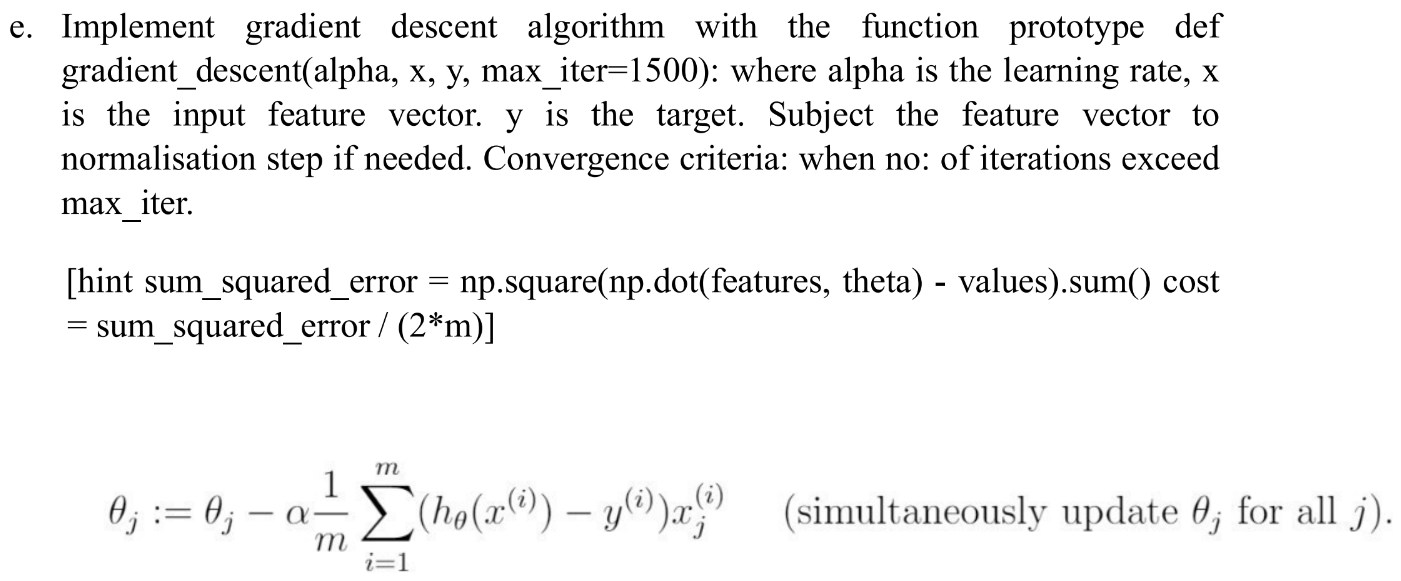

In [16]:
h = lambda x, params: params[0]*x + params[1]
grad = lambda x, y, params: (-2/y.shape[0])*np.array([np.sum(x*(y-h(x, params))), np.sum(y-h(x, params))])
cost = lambda x, y, params: np.sum(np.square(y - h(x, params)))/y.shape[0]


def gradient_descent(alpha, x, y, max_iter=1500, tolerance=[1e-52, 1e-52]):
  params = np.zeros(x.shape[1]+1)
  history = []
  history.append([params, cost(x, y, params)])
  for i in range(max_iter):
    gradient = grad(x, y, params)
    if abs(gradient[0]) <= tolerance[0] and abs(gradient[1]) <= tolerance[1] :
      return params, history
    params = params - alpha*grad(x, y, params)
    history.append([params, cost(x, y, params)])
  return params, history
params, history = gradient_descent(0.01, X, y)

In [17]:
print(params)

[0.67662816 9.27819384]


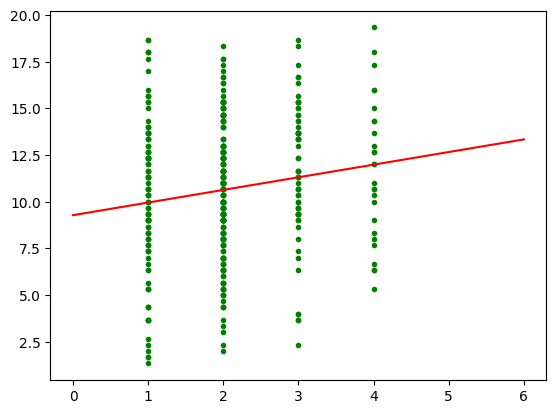

In [18]:
plt.plot(X, y, 'g.')
plt.plot(np.linspace(0, 6, 100), h(np.linspace(0, 6, 100) ,params), 'r-')

[ 0.16054445 -0.32677908]


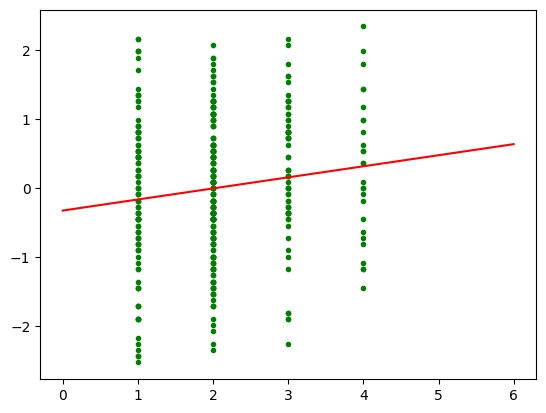

In [19]:
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)
params, history = gradient_descent(0.17, X, y_scaled)
print(params)
plt.plot(X, y_scaled, 'g.')
plt.plot(np.linspace(0, 6, 100), h(np.linspace(0, 6, 100) ,params), 'r-')

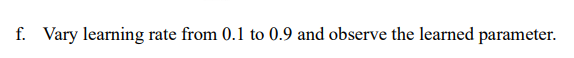

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-16-b3a87491cd4f>:3: RuntimeWarning: overflow encountered in square
  cost = lambda x, y, params: np.sum(np.square(y - h(x, params)))/y.shape[0]
<ipython-input-16-b3a87491cd4f>:14: RuntimeWarning: invalid value encountered in subtract
  params = params - alpha*grad(x, y, params)


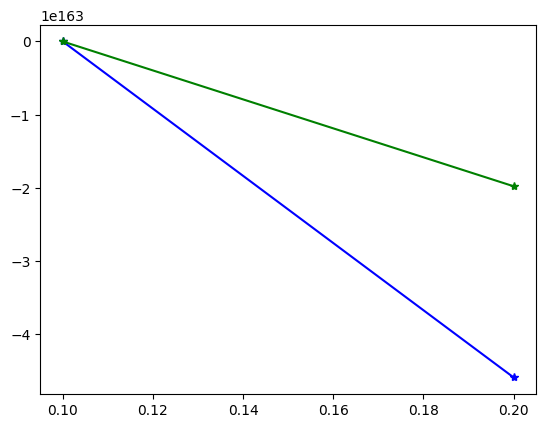

In [20]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
parameters = []
for i in alpha:
  parameters.append(gradient_descent(i, X, y_scaled)[0])
plt.plot(alpha, [i[0] for i in parameters], 'b*-')
plt.plot(alpha, [i[1] for i in parameters], 'g*-')

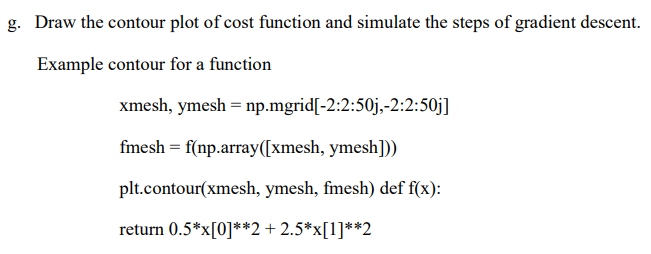

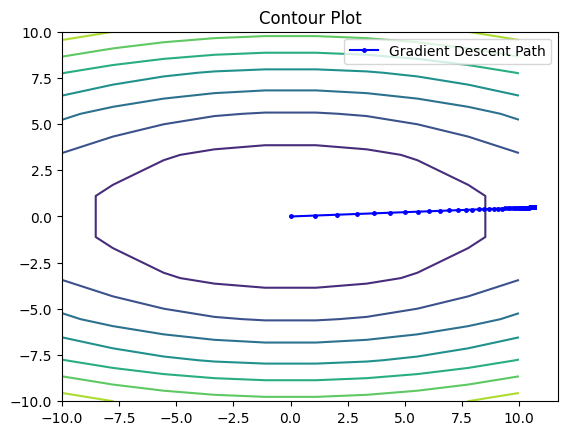

In [23]:
def f(x):
    return 0.5 * x[0]**2 + 2.5 * x[1]**2

def gradient_descent(alpha, x, y, max_iter=1500):
    x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    x = np.c_[np.ones(x.shape[0]), x]
    m, n = x.shape
    o = np.zeros(n)
    pre = [o.copy()]

    for i in range(max_iter):
        h = np.dot(x, o)
        e = h - y
        gradient = np.dot(x.T, e) / m
        o -= alpha * gradient
        pre.append(o.copy())

    return pre

X = db['studytime'].values
y = db['Grade'].values

alpha = 0.1
pr = gradient_descent(alpha, X, y)


xmesh, ymesh = np.mgrid[-10:10:10j, -10:10:10j]
fmesh = f(np.array([xmesh, ymesh]))
plt.contour(xmesh, ymesh, fmesh)
plt.title('Contour Plot')


pre = np.array(pr)
plt.plot(pre[:, 0], pre[:, 1], 'b.-', markersize=5, label='Gradient Descent Path')
plt.legend()

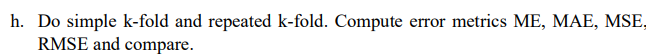

In [25]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error


n_splits = 7
n_repeats = 5

a, b, c, rc = [], [], [], []

X = db['studytime'].values.reshape(-1, 1)
y = db['Grade'].values.reshape(-1, 1)


kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for tr, te in kf.split(X):
    X_train, X_test = X[tr], X[te]
    y_train, y_test = y[tr], y[te]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    a.append(me)
    mae = mean_absolute_error(y_test, y_pred)
    b.append(mae)
    mse = mean_squared_error(y_test, y_pred)
    c.append(mse)
    rmse = np.sqrt(mse)
    rc.append(rmse)

me, mae, mse, rmse = np.mean(a), np.mean(b), np.mean(c), np.mean(rc)
print("Simple K-Fold:")
print("ME: ", me, "MAE: ",mae,"MSE: ",mse,"RMSE: ",rmse)

Simple K-Fold:
ME:  -0.0037840739282395475 MAE:  2.9731256142021385 MSE:  13.525221129907312 RMSE:  3.6720114116473206


In [26]:
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
ar, br, cr, rcr = [],[],[],[]

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    ar.append(me)
    mae = mean_absolute_error(y_test, y_pred)
    br.append(mae)
    mse = mean_squared_error(y_test, y_pred)
    cr.append(mse)
    rmse = np.sqrt(mse)
    rcr.append(rmse)

mer, maer, mser, rmser = np.mean(ar), np.mean(br), np.mean(cr), np.mean(rcr)
print("\nRepeated K-Fold Metrics:")
print("ME: ",mer, " MAE: ",maer, " MSE: ",mser, " RMSE: ",rmser)


Repeated K-Fold Metrics:
ME:  -0.0031085702915355103  MAE:  2.9694746983729687  MSE:  13.51296297654079  RMSE:  3.6689765829781638
